In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv("Train.csv")
data2 = pd.read_csv("Test.csv")

data = pd.concat([data1, data2], ignore_index = 1)

In [3]:
data.head()

,ID_Zindi,Date,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2
0,ID_ENTGC7,1/1/19,PD01,45.601585,11.903551,0.000000,NaN,0.230527,0.559117,0.000024,0.000117,NaN,14440.82126,31.0
1,ID_8JCCXC,1/1/19,PD04,45.371005,11.840830,3.047342,NaN,-0.074006,0.869309,0.000024,0.000127,NaN,14441.79815,42.0
2,ID_V3136Z,1/1/19,RO01,45.045825,12.060869,0.000000,NaN,0.024470,0.674160,0.000024,0.000086,NaN,14437.38294,31.0
3,ID_KRVZDJ,1/1/19,RO02,45.104075,11.553241,1.200467,NaN,-0.010442,0.920054,0.000024,0.000124,NaN,14440.83831,30.0
4,ID_PR351A,1/1/19,RO03,45.038758,11.790152,1.274564,NaN,-0.176178,0.747464,0.000024,0.000116,NaN,14438.79037,58.0


In [4]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)
data.set_index('Date', inplace=True)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_40120/811855129.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)


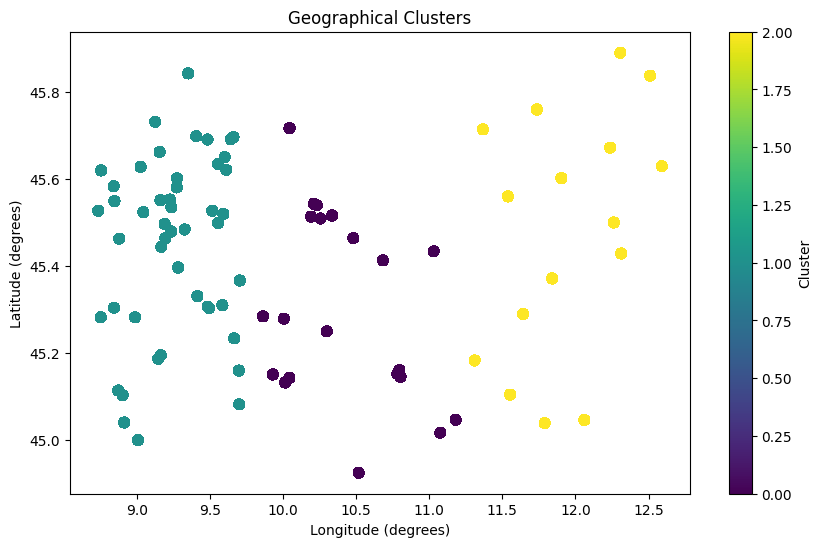

In [5]:
from sklearn.cluster import KMeans

data['LAT'] = np.radians(data['LAT'])
data['LON'] = np.radians(data['LON'])

data['x'] = np.cos(data['LAT']) * np.cos(data['LON'])
data['y'] = np.cos(data['LAT']) * np.sin(data['LON'])
data['z'] = np.sin(data['LAT'])

X = data[['x', 'y', 'z']].values
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    np.degrees(data['LON']),  
    np.degrees(data['LAT']),  
    c=data['Cluster'], cmap='viridis', s=50, marker='o'
)

plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.title('Geographical Clusters')
plt.show()


In [6]:
cluster_0 = data[data['Cluster'] == 0].reset_index(drop=True)
cluster_1 = data[data['Cluster'] == 1].reset_index(drop=True)
cluster_2 = data[data['Cluster'] == 2].reset_index(drop=True)

In [7]:
cluster_0

,ID_Zindi,ID,LAT,LON,Precipitation,LST,AAI,CloudFraction,NO2_strat,NO2_total,NO2_trop,TropopausePressure,GT_NO2,x,y,z,Cluster
0,ID_4V6J0O,VR04,0.792963,0.192520,4.588969,NaN,-0.110994,0.776272,0.000024,0.000145,NaN,14442.46222,40.000,0.688773,0.134265,0.712435,0
1,ID_XFGGN9,X10079,0.792602,0.186460,1.800207,NaN,-0.352985,0.622817,0.000024,0.000171,NaN,14442.65422,22.250,0.689826,0.130137,0.712183,0
2,ID_BUM3G3,X10097,0.786210,0.195144,2.929149,NaN,-0.002400,0.881816,0.000024,0.000268,NaN,14440.19880,22.400,0.693122,0.137002,0.707680,0
3,ID_OB4V7B,X10167,0.785693,0.193314,2.950671,NaN,0.121945,0.955316,0.000024,0.000360,NaN,14438.88636,31.275,0.693731,0.135804,0.707315,0
4,ID_131CBB,X12017,0.788024,0.173322,1.876741,NaN,0.190684,0.769713,0.000024,0.000349,NaN,14443.62723,27.375,0.694681,0.121624,0.708961,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23011,ID_AP96YP,X6877,0.788047,0.188171,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.692783,0.131922,0.708977,0
23012,ID_81RUW2,X5953,0.787701,0.174808,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694725,0.122696,0.708733,0
23013,ID_6XNW56,X6877,0.788047,0.188171,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.692783,0.131922,0.708977,0
23014,ID_GD6HNP,X5953,0.787701,0.174808,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694725,0.122696,0.708733,0


In [35]:
cluster_0_data_2019 = cluster_0[cluster_0.index.year == 2019]
cluster_0_data_2020 = cluster_0[cluster_0.index.year == 2020]
cluster_0_data_2021 = cluster_0[cluster_0.index.year == 2021]

# Print the number of records for verification
print(f"2019 data shape: {cluster_0_data_2019.shape}")
print(f"2020 data shape: {cluster_0_data_2020.shape}")
print(f"2021 data shape: {cluster_0_data_2021.shape}")

AttributeError: 'RangeIndex' object has no attribute 'year'

In [ ]:
data.set_index('Date', inplace=True)

# Interpolate missing values using time-weighted interpolation
data['LST'] = data['LST'].interpolate(method='time')

# Reset the index if needed for further analysis
data.reset_index(inplace=True)